## Import data/files


In [ ]:
import pandas as pd

transactions = pd.read_json("transactions.json", lines=True)

merchants = pd.read_csv('merchants.csv')

users = pd.read_csv('users.csv')

df_tmp = transactions.merge(merchants,  how="left", on="merchant_id")

df = df_tmp.merge(users, how="left", on="user_id") # Main dataframe
print(df.columns)

Index(['transaction_id', 'timestamp', 'user_id', 'merchant_id', 'amount', 'channel', 'currency', 'device', 'location', 'payment_method', 'is_international', 'session_length_seconds', 'is_first_time_merchant', 'is_fraud', 'category', 'country_x', 'trust_score', 'number_of_alerts_last_6_months', 'avg_transaction_amount', 'account_age_months', 'has_fraud_history', 'age', 'sex', 'education', 'primary_source_of_income', 'sum_of_monthly_installments', 'sum_of_monthly_expenses', 'country_y', 'signup_date', 'risk_score'], dtype='object')


In [ ]:
df.head(2)

,transaction_id,timestamp,user_id,merchant_id,amount,channel,currency,device,location,payment_method,is_international,session_length_seconds,is_first_time_merchant,is_fraud,category,country_x,trust_score,number_of_alerts_last_6_months,avg_transaction_amount,account_age_months,has_fraud_history,age,sex,education,primary_source_of_income,sum_of_monthly_installments,sum_of_monthly_expenses,country_y,signup_date,risk_score
0,TX000000,2022-06-17 23:28:00,U14804,M0314,130.03,in-store,EUR,Android,"{'lat': 40.057938, 'long': 14.959737}",debit_card,1,145,0,0,travel,France,0.581711,3,74.97,23,1,23,Female,Bachelor,Savings,336.26,93.70,Sweden,2022-08-10,0.426675
1,TX000001,2022-01-04 15:39:00,U16634,M0675,132.00,online,EUR,Android,"{'lat': 42.05935, 'long': 1.596625}",debit_card,1,32,1,0,electronics,Germany,0.568933,2,56.92,23,0,53,Female,PhD,Business,513.43,2047.83,France,2024-05-22,0.729627



# **Correlation with is_fraud**:



Correlation on numerical data

In [ ]:
# Type of data in df

df.dtypes

,0
transaction_id,object
timestamp,datetime64[ns]
user_id,object
merchant_id,object
amount,float64
channel,object
currency,object
device,object
location,object
payment_method,object


In [ ]:
# Select only numeric types
numerics_df = df.select_dtypes(include=['int64', 'float64'])
numerics_df.head(2)

,amount,is_international,session_length_seconds,is_first_time_merchant,is_fraud,trust_score,number_of_alerts_last_6_months,avg_transaction_amount,account_age_months,has_fraud_history,age,sum_of_monthly_installments,sum_of_monthly_expenses,risk_score
0,130.03,1,145,0,0,0.581711,3,74.97,23,1,23,336.26,93.70,0.426675
1,132.00,1,32,1,0,0.568933,2,56.92,23,0,53,513.43,2047.83,0.729627


In [ ]:
# Count correlation
corr = numerics_df.corr()
corr.head(5)

,amount,is_international,session_length_seconds,is_first_time_merchant,is_fraud,trust_score,number_of_alerts_last_6_months,avg_transaction_amount,account_age_months,has_fraud_history,age,sum_of_monthly_installments,sum_of_monthly_expenses,risk_score
amount,1.000000,0.000554,0.000056,0.002052,0.002197,0.000981,-0.000849,0.002366,0.000596,0.001132,-0.000385,0.002264,0.000499,0.000380
is_international,0.000554,1.000000,-0.000299,0.000824,0.019202,-0.000491,-0.000298,-0.001947,0.001759,-0.000260,-0.000268,-0.000198,0.002441,-0.000052
session_length_seconds,0.000056,-0.000299,1.000000,-0.000832,-0.001980,0.000718,0.000036,-0.002059,-0.000773,0.000562,0.001706,0.001994,-0.002196,0.000404
is_first_time_merchant,0.002052,0.000824,-0.000832,1.000000,0.000051,0.000263,0.000913,-0.001912,-0.002827,-0.000697,-0.001378,-0.002130,0.001023,-0.000871
is_fraud,0.002197,0.019202,-0.001980,0.000051,1.000000,-0.034161,-0.001193,0.001112,0.002104,0.054435,0.001443,-0.000318,-0.001265,-0.025765


In [ ]:
fraud_corr = corr['is_fraud']
fraud_corr

,is_fraud
amount,0.002197
is_international,0.019202
session_length_seconds,-0.001980
is_first_time_merchant,0.000051
is_fraud,1.000000
trust_score,-0.034161
number_of_alerts_last_6_months,-0.001193
avg_transaction_amount,0.001112
account_age_months,0.002104
has_fraud_history,0.054435


## Visualization

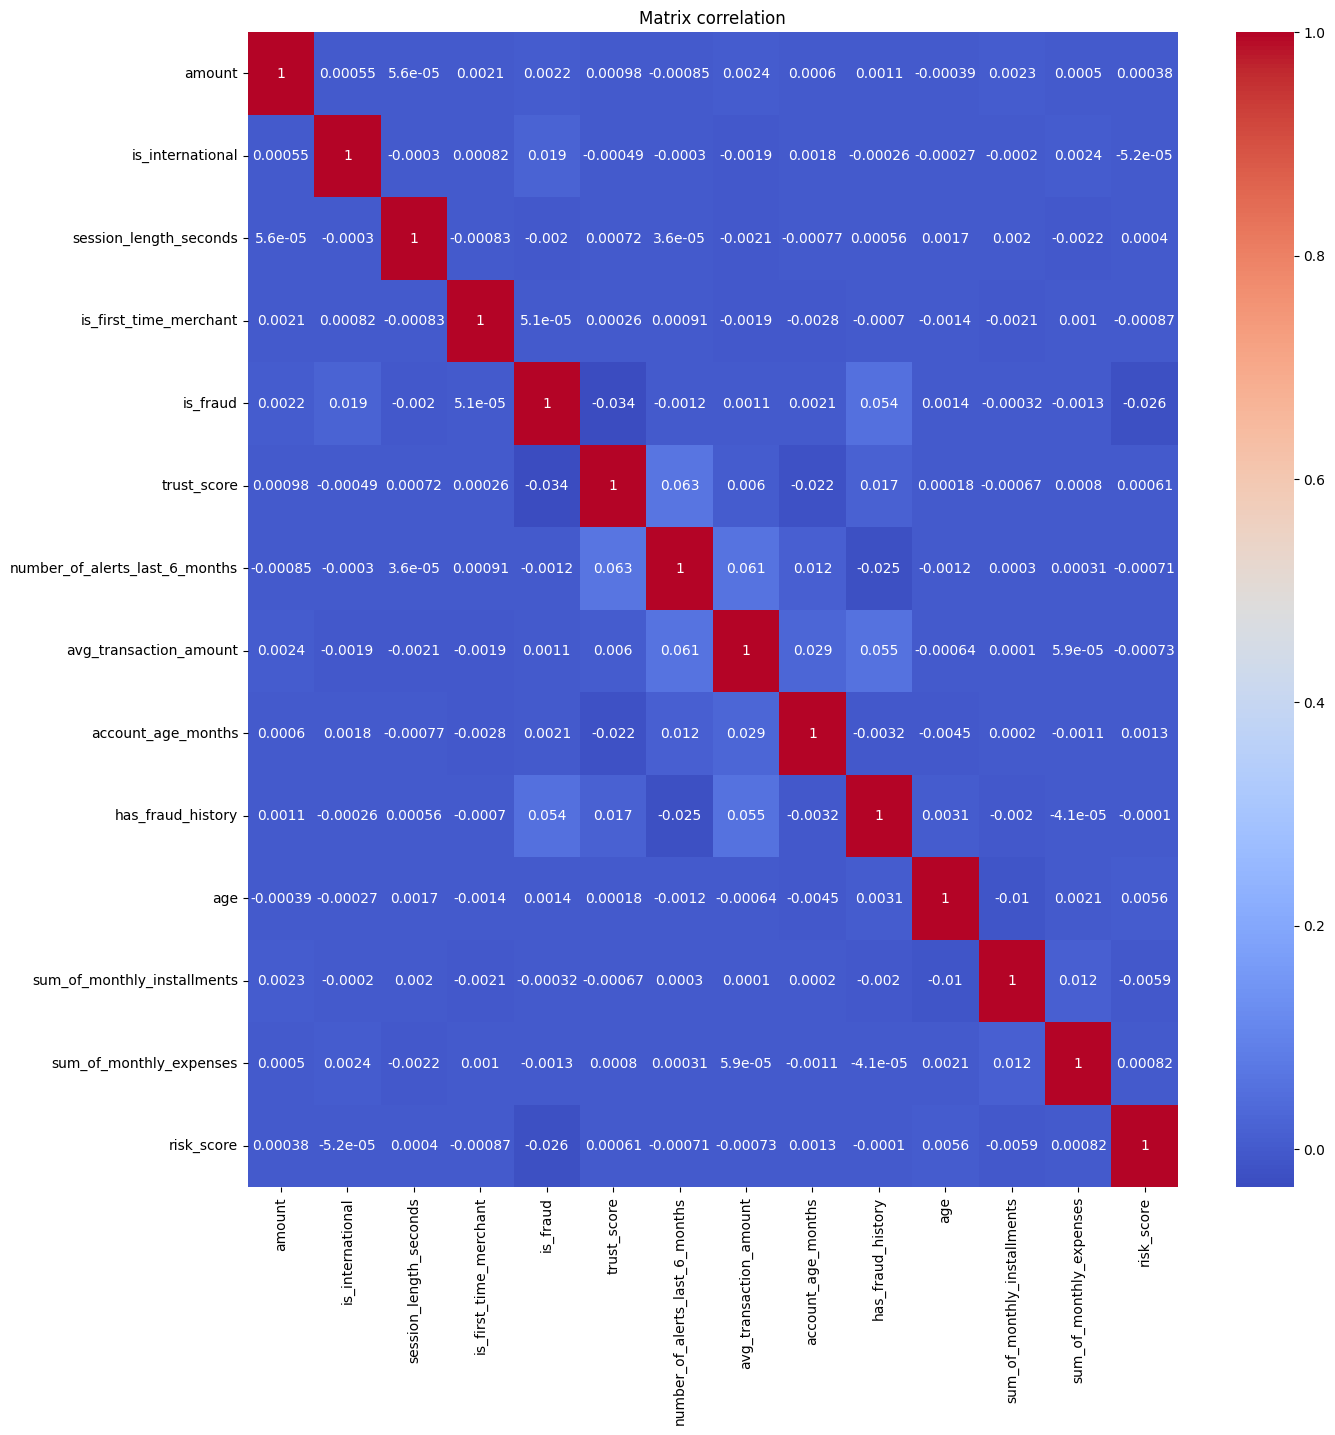

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 15))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Matrix correlation')
plt.show()

## # Chi-square test

In [ ]:

import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

def prepare_for_chi2(df, target_col='is_fraud'):
    results = []

    for col in df.columns:
        if col == target_col:
            continue

        if pd.api.types.is_numeric_dtype(df[col]):
            try:
                df[f'{col}_cat'] = pd.qcut(df[col], q=5, duplicates='drop', labels=False)
                current_col = f'{col}_cat'
            except:
                continue
        else:
            current_col = col

        if df[current_col].nunique() < 2:
            continue

        try:
            contingency_table = pd.crosstab(df[current_col], df[target_col])

            chi2, p, dof, expected = chi2_contingency(contingency_table)

            n = contingency_table.sum().sum()
            v_cramer = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

            results.append({
                'variable': col,
                'type': 'numeric' if pd.api.types.is_numeric_dtype(df[col]) else 'categorical',
                'chi2': chi2,
                'p_value': p,
                'dof': dof,
                'v_cramer': v_cramer,
                'is_significant': p < 0.05
            })
        except:
            continue

    return pd.DataFrame(results)

chi2_results = prepare_for_chi2(numerics_df)

chi2_results = chi2_results.sort_values(by='p_value')

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
print(chi2_results)

                         variable     type        chi2        p_value  dof  v_cramer  is_significant
2                     trust_score  numeric  528.635525  4.285689e-113    4  0.032516            True
9                      risk_score  numeric  298.084749   2.805001e-63    4  0.024417            True
5              account_age_months  numeric   13.757238   8.111550e-03    4  0.005245            True
1          session_length_seconds  numeric    8.948270   6.240556e-02    4  0.004230           False
4          avg_transaction_amount  numeric    8.912538   6.332317e-02    4  0.004222           False
0                          amount  numeric    6.774119   1.483175e-01    4  0.003681           False
6                             age  numeric    3.927465   4.159114e-01    4  0.002803           False
7     sum_of_monthly_installments  numeric    3.230292   5.200522e-01    4  0.002542           False
3  number_of_alerts_last_6_months  numeric    1.750767   6.257067e-01    3  0.001871       

Correlation on text data (One-hot encoding or Label encoding)

In [ ]:
# Text object: transaction_id user_id merchant_id channel currency device payment_method sex education primary_source_of_income country_y category country_x

text_data = [
    'channel', 'currency', 'device', 'payment_method', 'sex', 'education', 'primary_source_of_income', 'country_y', 'category', 'country_x', 'is_fraud'
]

text_df = df[text_data]
text_df.head(2)

,channel,currency,device,payment_method,sex,education,primary_source_of_income,country_y,category,country_x,is_fraud
0,in-store,EUR,Android,debit_card,Female,Bachelor,Savings,Sweden,travel,France,0
1,online,EUR,Android,debit_card,Female,PhD,Business,France,electronics,Germany,0


In [ ]:
# Label encoding (based on classification)

from sklearn.preprocessing import LabelEncoder

text_df = text_df.copy()
for col in text_df.columns:
  if col != 'is_fraud':
    lEncoder = LabelEncoder()
    text_df.loc[:, col + '_label'] = lEncoder.fit_transform(text_df[col])

text_df.head(2)

,channel,currency,device,payment_method,sex,education,primary_source_of_income,country_y,category,country_x,...,channel_label,currency_label,device_label,payment_method_label,sex_label,education_label,primary_source_of_income_label,country_y_label,category_label,country_x_label
0,in-store,EUR,Android,debit_card,Female,Bachelor,Savings,Sweden,travel,France,...,0,0,0,2,0,0,3,13,6,5
1,online,EUR,Android,debit_card,Female,PhD,Business,France,electronics,Germany,...,2,0,0,2,0,3,0,5,2,6


In [ ]:
print(text_df.columns)

Index(['channel', 'currency', 'device', 'payment_method', 'sex', 'education',
       'primary_source_of_income', 'country_y', 'category', 'country_x',
       'is_fraud', 'channel_label', 'currency_label', 'device_label',
       'payment_method_label', 'sex_label', 'education_label',
       'primary_source_of_income_label', 'country_y_label', 'category_label',
       'country_x_label'],
      dtype='object')


In [ ]:
tmp = [
      'channel_label', 'currency_label', 'device_label',
       'payment_method_label', 'sex_label', 'education_label',
       'primary_source_of_income_label', 'country_y_label', 'category_label',
       'country_x_label', 'is_fraud'
]
print(text_df.columns)
text_df = text_df[tmp]
text_df.head(2)

Index(['channel', 'currency', 'device', 'payment_method', 'sex', 'education',
       'primary_source_of_income', 'country_y', 'category', 'country_x',
       'is_fraud', 'channel_label', 'currency_label', 'device_label',
       'payment_method_label', 'sex_label', 'education_label',
       'primary_source_of_income_label', 'country_y_label', 'category_label',
       'country_x_label'],
      dtype='object')


,channel_label,currency_label,device_label,payment_method_label,sex_label,education_label,primary_source_of_income_label,country_y_label,category_label,country_x_label,is_fraud
0,0,0,0,2,0,0,3,13,6,5,0
1,2,0,0,2,0,3,0,5,2,6,0


In [ ]:
# Euro is the only currency in our dataset, let's change text_df

text_corr = text_df.corr(method='spearman')
text_corr

,channel_label,device_label,payment_method_label,sex_label,education_label,primary_source_of_income_label,country_y_label,category_label,country_x_label,is_fraud
channel_label,1.000000,0.001895,-0.000778,0.000263,-0.000404,-0.002282,-0.000929,0.001525,0.000262,0.001258
device_label,0.001895,1.000000,0.001844,0.000698,0.001659,0.002893,0.001073,0.000312,0.001038,-0.000374
payment_method_label,-0.000778,0.001844,1.000000,0.000029,0.002320,-0.001604,0.002459,-0.002179,0.000874,0.000883
sex_label,0.000263,0.000698,0.000029,1.000000,0.005924,0.001334,-0.009864,-0.000426,0.002702,0.002051
education_label,-0.000404,0.001659,0.002320,0.005924,1.000000,0.004608,0.014404,0.002154,0.000748,0.001893
primary_source_of_income_label,-0.002282,0.002893,-0.001604,0.001334,0.004608,1.000000,-0.008723,0.001078,-0.000366,-0.000693
country_y_label,-0.000929,0.001073,0.002459,-0.009864,0.014404,-0.008723,1.000000,-0.000476,-0.001849,-0.002435
category_label,0.001525,0.000312,-0.002179,-0.000426,0.002154,0.001078,-0.000476,1.000000,-0.014359,-0.001009
country_x_label,0.000262,0.001038,0.000874,0.002702,0.000748,-0.000366,-0.001849,-0.014359,1.000000,-0.001008
is_fraud,0.001258,-0.000374,0.000883,0.002051,0.001893,-0.000693,-0.002435,-0.001009,-0.001008,1.000000


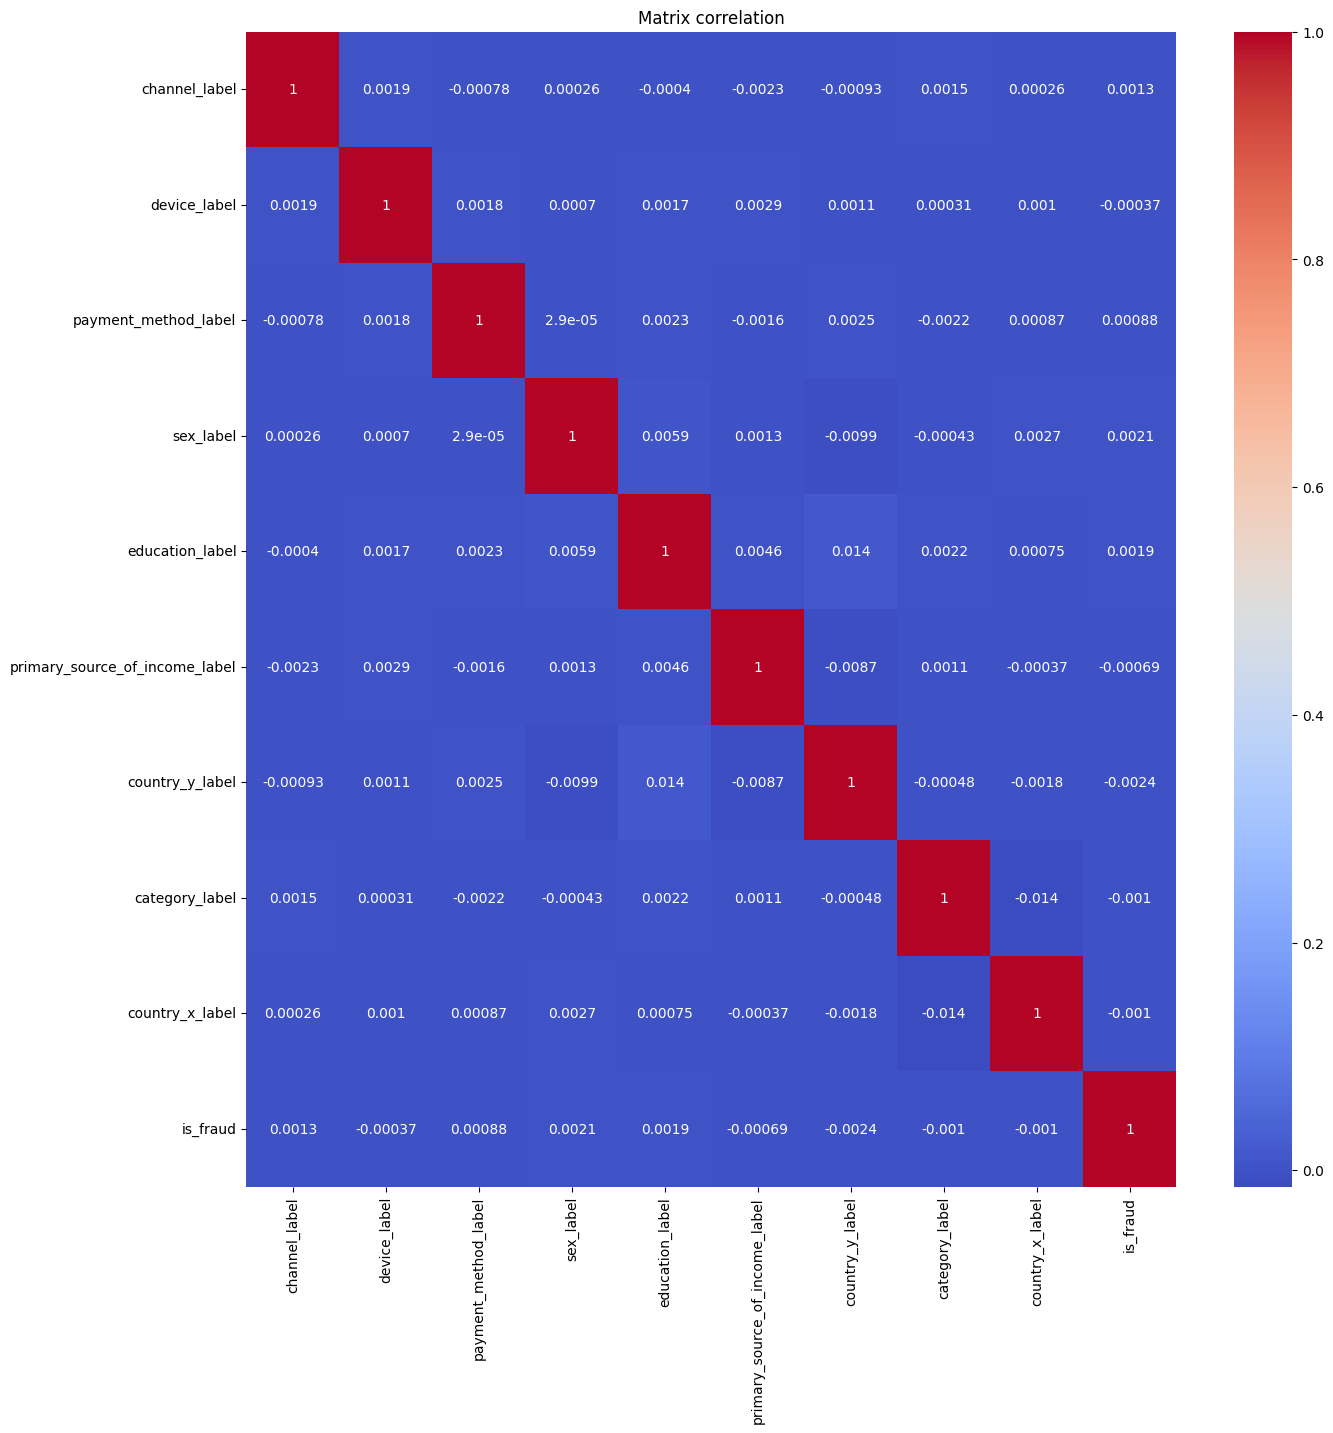

In [ ]:
# Visualization: Correlation for text data

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 15))
sns.heatmap(text_corr, annot=True, cmap='coolwarm')
plt.title('Matrix correlation')
plt.show()

<Figure size 800x600 with 0 Axes>

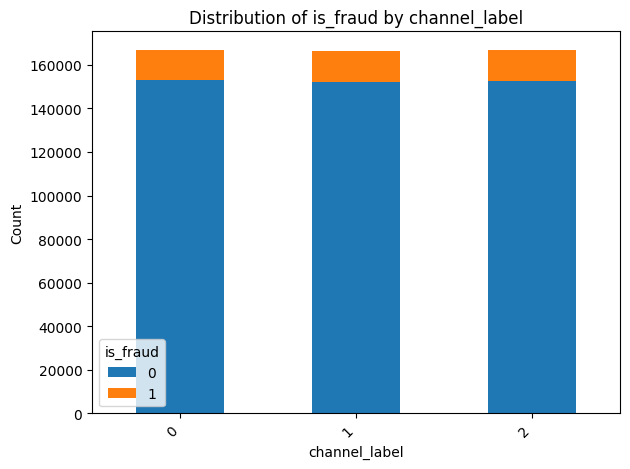

<Figure size 800x600 with 0 Axes>

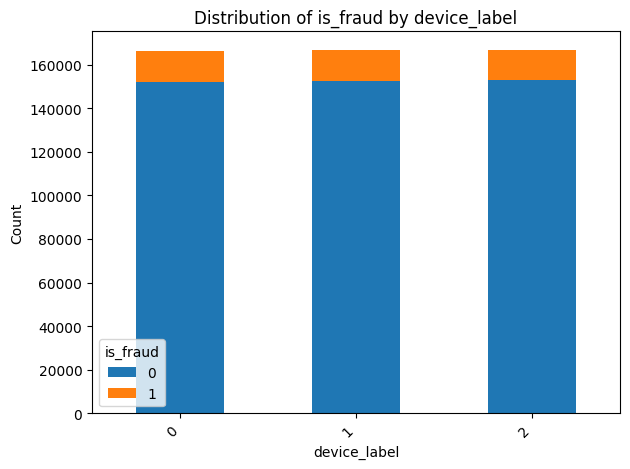

<Figure size 800x600 with 0 Axes>

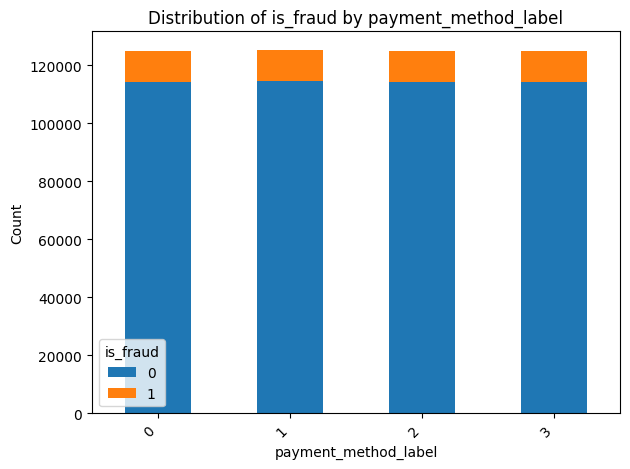

<Figure size 800x600 with 0 Axes>

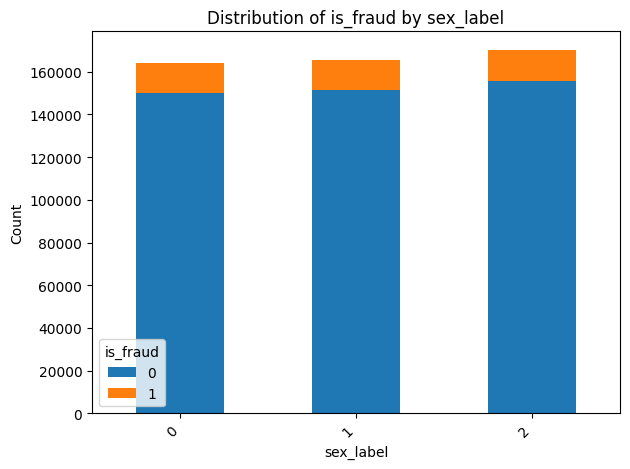

<Figure size 800x600 with 0 Axes>

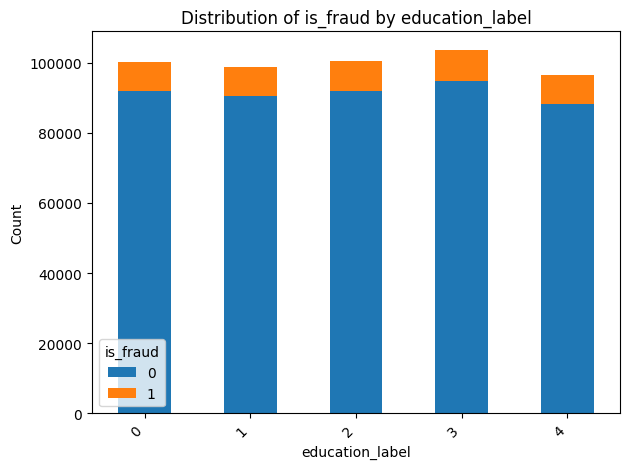

<Figure size 800x600 with 0 Axes>

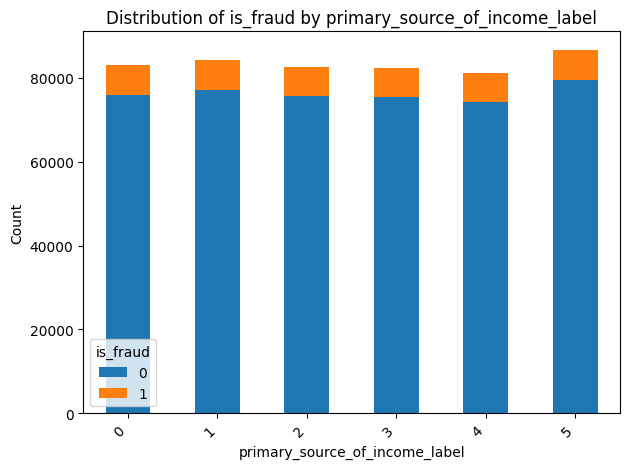

<Figure size 800x600 with 0 Axes>

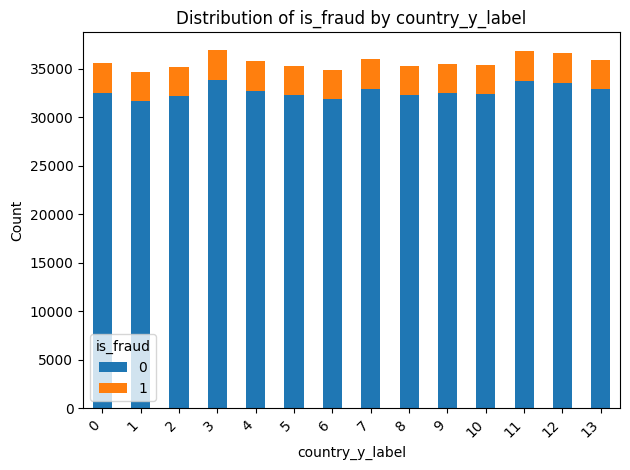

<Figure size 800x600 with 0 Axes>

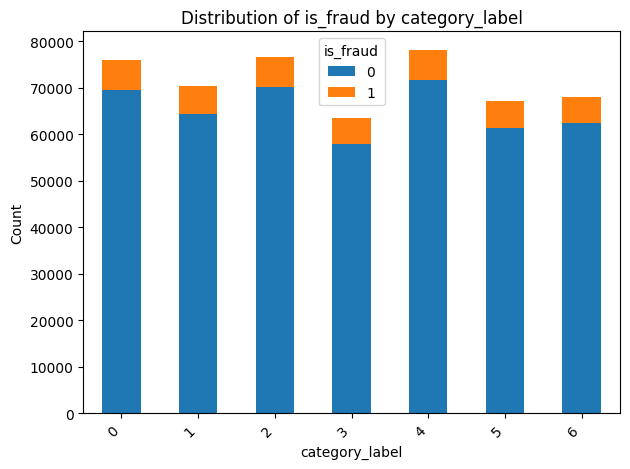

<Figure size 800x600 with 0 Axes>

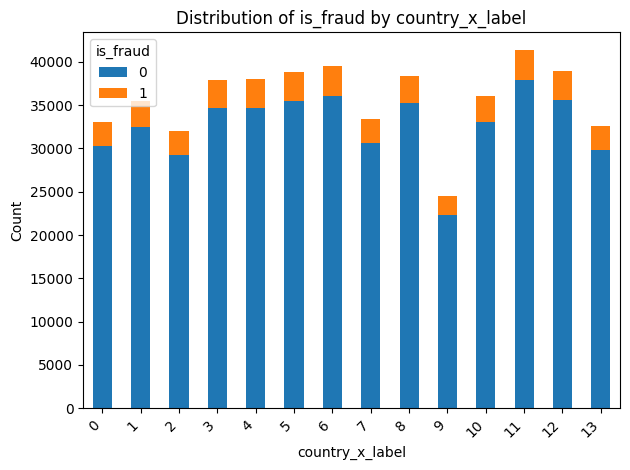

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

for col in text_df.columns:
  if col != 'is_fraud':
    plt.figure(figsize=(8, 6))
    pd.crosstab(text_df[col], text_df['is_fraud']).plot(kind='bar', stacked=True)
    plt.title(f'Distribution of is_fraud by {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='is_fraud')
    plt.tight_layout()
    plt.show()

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

for col in text_df.columns:
  if col != 'is_fraud':
    contingency_table = pd.crosstab(text_df[col], text_df['is_fraud'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"P-value for {col} and is_fraud: {p}")


P-value for channel_label and is_fraud: 0.6540934235638558
P-value for device_label and is_fraud: 0.9582566442990968
P-value for payment_method_label and is_fraud: 0.420781153972382
P-value for sex_label and is_fraud: 0.34929480766212095
P-value for education_label and is_fraud: 0.6115882860609128
P-value for primary_source_of_income_label and is_fraud: 0.8987705816817174
P-value for country_y_label and is_fraud: 0.5158915113392246
P-value for category_label and is_fraud: 0.027987237485543947
P-value for country_x_label and is_fraud: 0.00639127767972362


Correlation on date


In [ ]:
# ...

**Na podstawie przeprowadzonych statystyk możemy wskazać kolumny, które najbardziej wpływają na wystąpienie oszustwa:**

*   country_x
*   category
*   trust_score
*   has_fraud_history
*   is_international
*   account_age_months
*   risk_score  

**Zależność danych została przygotowana na podstawie technik:**

*   Korelacja Pearson'a
*   Test Chi-kwadrat
*   Tabela kontygencji

Dodatkowo, *EUR* jako waluta jest jedyną występująca waluta w naszym zbiorze

